## Exercise 1 - **Money in the bank**

The goal of this exercise is to familiarise with:
- array initialisation
- `for` loop
- indexing
- update rule
- basic visualisation

You are managing assets from a client which has an initial wealth `M_init` of 20kCHF. Your client's business generates yearly savings `M_save` of 500CHF.

In [74]:
M_init  = 20000.0   # initial wealth
M_save  = 500.0;    # yearly savings

### Question 1

Model the wealth evolution of your client for the coming 35 years `tot_yrs`:

In [75]:
tot_yrs = 35;       # number of years

To do so, we will first initialise a one dimensional array (vector) to store the wealth evolution of the client and check that the vector `M_evol1` has the correct `length` (or size):

In [76]:
M_evol1 = zeros(tot_yrs)
length(M_evol1)

35

We then need to initialise that vector with the initial wealth of the client:

In [77]:
M_evol1[1] = M_init;

Now we have to define the core of our simulator; predicting the wealth evolution. To do so, we will define the the wealth fo the current year `it` as the wealth from previous year `it-1` plus the amount of saving `M_save` and repeat this for `tot_yrs` (taking care about the start value of the iterator):

In [78]:
for it=2:tot_yrs
    M_evol1[it] =  M_evol1[it-1] + M_save
end

Now, we want to print the wealth of our client after `tot_yrs`

In [79]:
println("Wealth after $(tot_yrs) years: $(M_evol1[end]) CHF")

Wealth after 35 years: 37000.0 CHF


Perfect. However, the client is interested in a graphical evolution as he needs this to convince future investors.

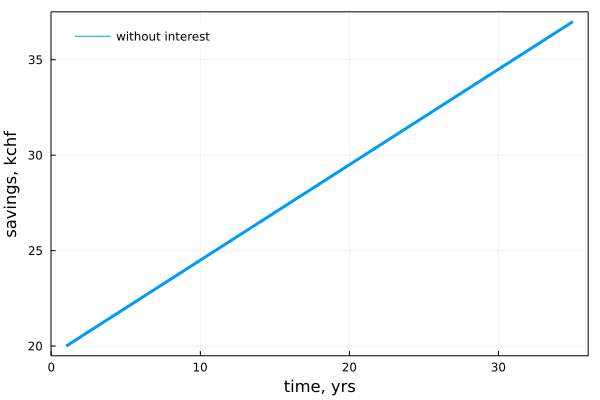

In [80]:
using Plots
plot(M_evol1 ./ 1000, linewidth=3,
     xlabel="time, yrs", ylabel="savings, kchf", label="without interest",
     framestyle=:box, legend=:topleft, foreground_color_legend = nothing)

### Question 2

The bank you are working for offers actually a yearly interest rate `intrst` of 0.6% for all premium client, a category your client belongs to. Repeat the exercise from Question 1 including now the interest rate.

Create a new vector `M_evol2` to store the wealth evolution with interest rate and assign the initial wealth:

In [81]:
intrst     = 0.006     # fixed interest rate
M_evol2    = zeros(tot_yrs)
M_evol2[1] = M_init;

Then, update the prediction formula within the time loop to account for the interest rate (changing the update formula)

In [82]:
# TO DO: add correct formula !
for it=2:tot_yrs
    M_evol2[it] = M_evol2[it-1] * (1+intrst) + M_save
end

> 💡 hint: Each year, the total wealth is the wealth of previous year plus the percentage proportional to the interest rate.

Report the total wealth of the client after `tot_yrs`:

In [83]:
println("Wealth after $(tot_yrs) years with interest rate: $(M_evol2[end]) CHF")

Wealth after 35 years with interest rate: 43306.92378094599 CHF


And display the graphical evolution on top of previous one:

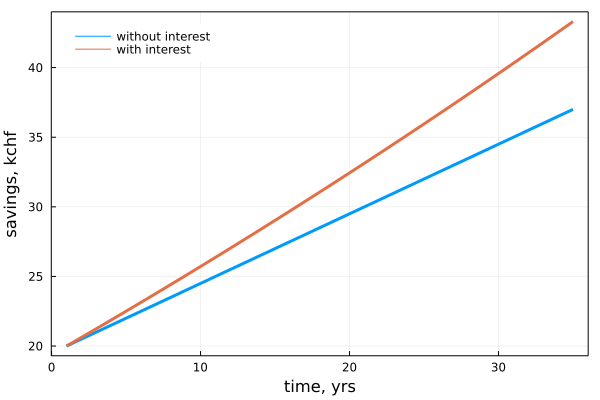

In [84]:
plot!(M_evol2 ./ 1000, linewidth=3, label="with interest")

Finally, quantify the difference in the final wealth with and without interest rate:

In [85]:
∆evo = M_evol2[end] - M_evol1[end]
println("∆evo = $(round(∆evo, sigdigits=5))")

∆evo = 6306.9


### Question 3

Great job, your client is very happy and could use the financial prediction you made to convince the investors to further support his business. Your client now wants to know the final wealth after 35 years given the fact he plans a one time expense `expns` of 1125CHF in 20 years. Provide the final wealth and a graphical evolution for both cases with and without interest rate.

In [86]:
expns = 1125
expenset = 20
M_evol3 = zeros(tot_yrs)
M_evol3[1] = M_init
M_evol4 = zeros(tot_yrs)
M_evol4[1] = M_init
for it=2:tot_yrs
    M_evol3[it] = M_evol3[it-1]+M_save
    M_evol4[it] = M_evol4[it-1]*(1+intrst)+M_save
    if it == expenset
        M_evol3[it] -= expns
        M_evol4[it] -= expns
    end
end

In [87]:
foreach([M_evol3,M_evol4]) do evol
    println("finalwealth = $(round(evol[end],sigdigits=5))")
end

finalwealth = 35875.0
finalwealth = 42076.0


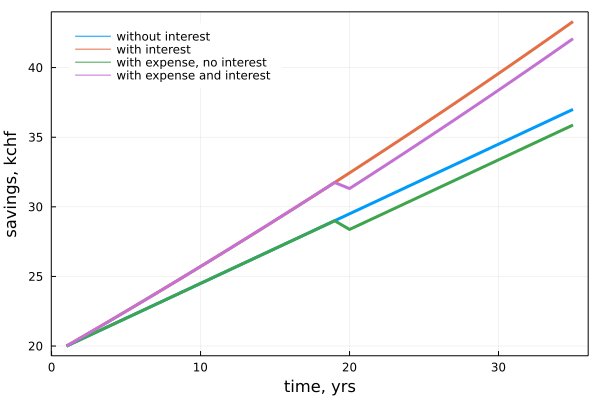

In [88]:
plot!(M_evol3 ./ 1000, linewidth=3, label="with expense, no interest")
plot!(M_evol4 ./ 1000, linewidth=3, label="with expense and interest")

### Question 4

The final task you'll have to perform for your client before transferring his dossier to another department within the bank is to predict his wealth evolution taking market's randomness into account.

Define a yearly variable interest rate of 0.5% +/- 1%. Report the final wealth as well as a graphical evolution of your client's wealth taking the random market evolution into account for the coming 35 years.

finalwealth=46521.0


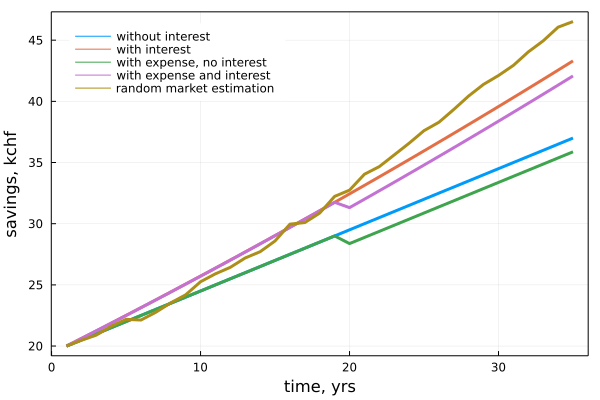

In [89]:
samplepct() = randn()+0.5
M_evol5 = zeros(tot_yrs)
M_evol5[1] = M_init
for it=2:tot_yrs
    M_evol5[it] = M_evol5[it-1]*(1+samplepct()/100) + M_save
end
println("finalwealth=$(round(M_evol5[end],sigdigits=5))")
plot!(M_evol5 ./ 1000, linewidth=3,label="random market estimation")

> 💡 hint: You can use `randn()` to generate a normally-distributed random number.

🎉 Good job! You are done with **Exercise 1**